In [ ]:
!unzip /content/drive/MyDrive/cars..zip

Archive:  /content/drive/MyDrive/cars..zip
  inflating: data/test/swift/03hnkjxhh2w83-IN.jpg  
  inflating: data/test/swift/03jxnlgy0jof3-IN.jpg  
  inflating: data/test/swift/07wx78v7q2xq-IN.jpg  
  inflating: data/test/swift/0aa2pr4uspgv1-IN.jpg  
  inflating: data/test/swift/0d2vshwzpl47-IN.jpg  
  inflating: data/test/swift/0eevnmjwqhwo1-IN.jpg  
  inflating: data/test/swift/0h25y93uxltq2-IN.jpg  
  inflating: data/test/swift/0jsbaz6cn5ej2-IN.jpg  
  inflating: data/test/swift/0k1qauxe04wh2-IN.jpg  
  inflating: data/test/swift/0kyhgeg8ei7o-IN.jpg  
  inflating: data/test/swift/0rwyuwdhxq263-IN.jpg  
  inflating: data/test/swift/0y1uw00h8qgp1-IN.jpg  
  inflating: data/test/swift/10g41cpjyura2-IN.jpg  
  inflating: data/test/swift/10ummzdgi5em1-IN.jpg  
  inflating: data/test/swift/17332v9hsoq01-IN.jpg  
  inflating: data/test/swift/19pvkwwtmo3q1-IN.jpg  
  inflating: data/test/swift/1c5aeixlnhot-IN.jpg  
  inflating: data/test/swift/1fc78cf7ab4k3-IN.jpg  
  inflating: data/test/sw

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import os

num_classes = 2
img_rows, img_cols = 64, 64
batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/data/train'
validation_data_dir = '/content/data/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = 2, activation = 'relu'))
# classifier.add(Dense(units = 16, activation = 'relu'))
# classifier.add(Dense(units = 8, activation = 'relu'))
# classifier.add(Dense(units = 4, activation = 'relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
activation_19 (Activation)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 64)       

In [ ]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("/content/drive/MyDrive/cars.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 5, #no of epocs we wait before stopping
                          verbose = 5,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 2400
nb_validation_samples = 800
epochs = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2400//16,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 800//16 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
150/150 [==============================] - 11s 64ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69315, saving model to /content/drive/MyDrive/cars.h5
Epoch 2/20
150/150 [==============================] - 9s 63ms/step - loss: 0.6929 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.69315
Epoch 3/20
150/150 [==============================] - 9s 63ms/step - loss: 0.6933 - accuracy: 0.4843 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.69315
Epoch 4/20
150/150 [==============================] - 10s 63ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 0.69315 to 0.69315, saving model to /content/drive/MyDrive/cars.h5
Epoch 5/20
150/150 [==============================] - 10s 64ms/step - loss: 0.6932 - accuracy: 0.5085 - val_loss: 0.69

In [ ]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
class_labels={0:"swift",1:"wagnor"}
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[  0 400]
 [  0 400]]
Classification Report
              precision    recall  f1-score   support

       swift       0.00      0.00      0.00       400
      wagnor       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


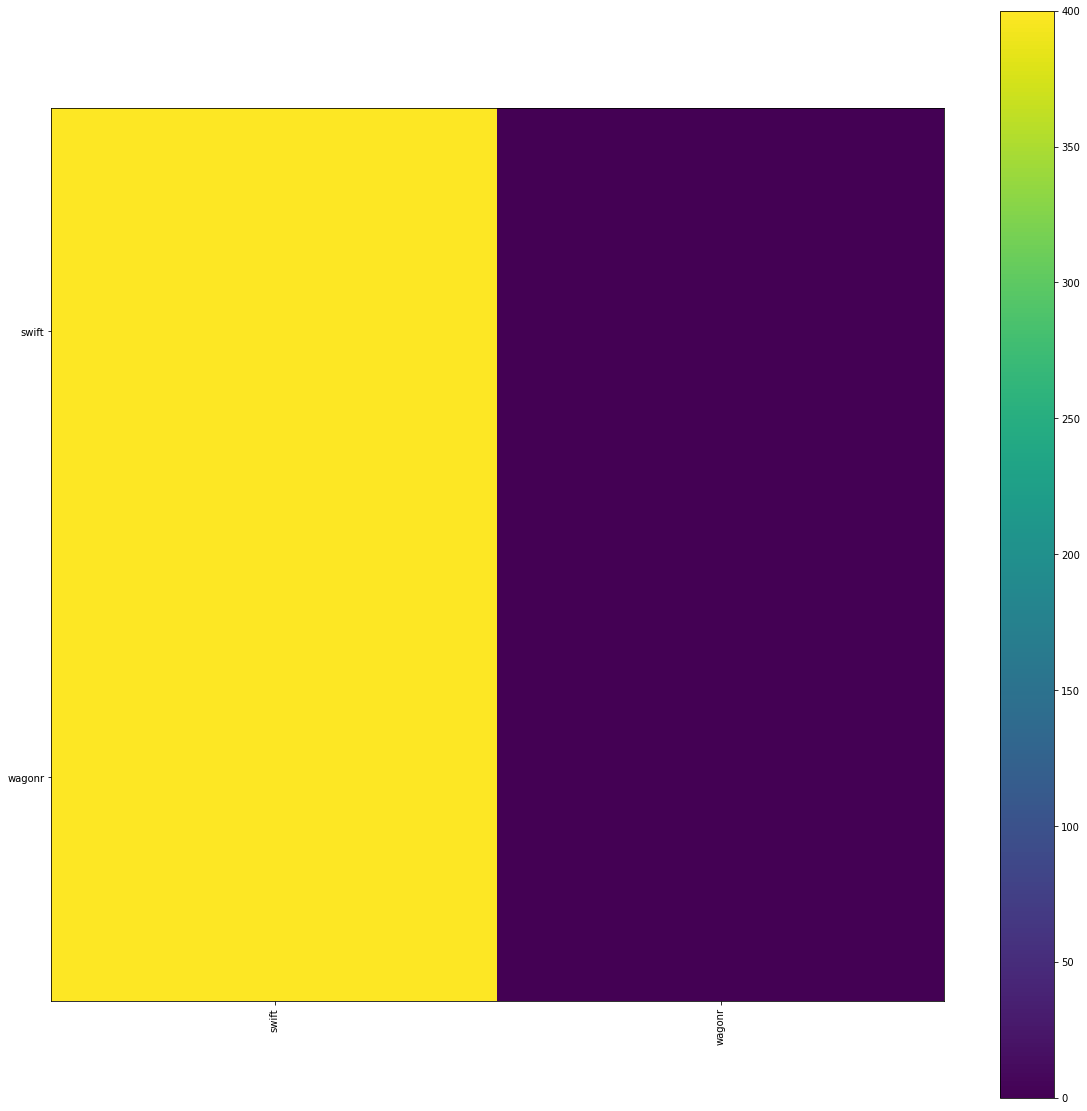

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 100,100,3
model = load_model('/content/drive/MyDrive/cars.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 2400
nb_validation_samples = 800

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/cars.h5')
test_image = image.load_img('/content/data/train/swift/00duslv28ydk2-IN.jpg',target_size = (64,64,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)



In [ ]:
print(result)

[[0.50017226 0.49982774]]
